The Silhouette Score evaluates how well clusters are formed using the Iris dataset, which includes measurements of iris flowers. It helps determine if the clusters are well-defined and distinct based on features like sepal and petal measurements. A higher score means better-defined clusters, aiding in choosing the right number of clusters for the dataset.

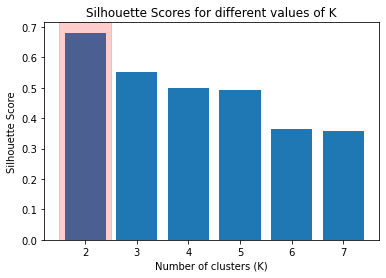

Best K value: 2
Silhouette Score: 0.6810461692117462


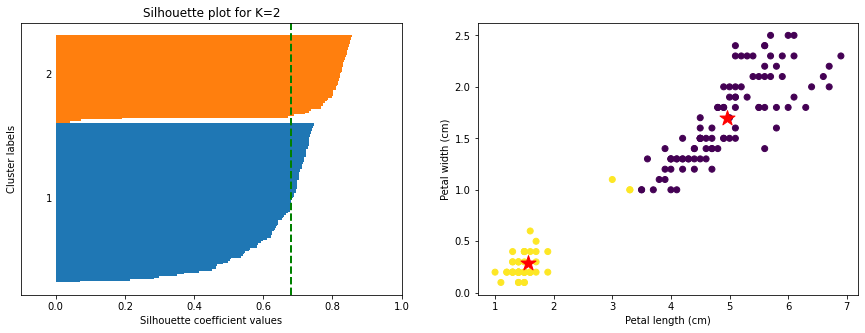

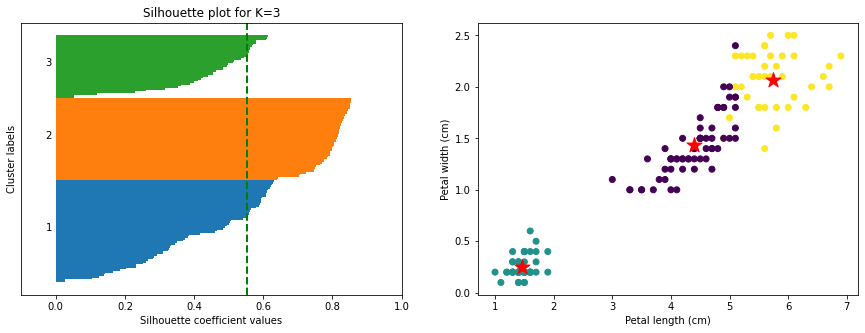

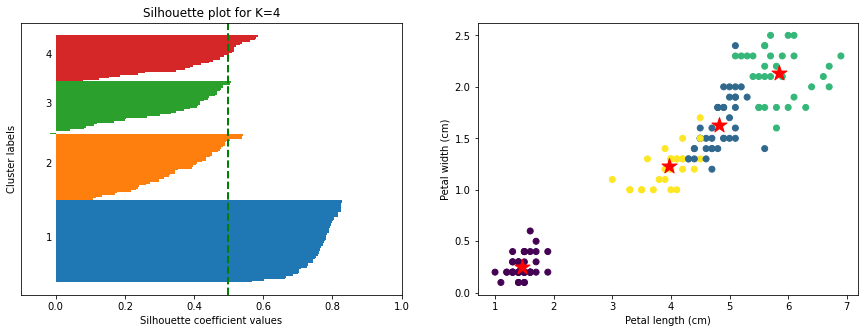

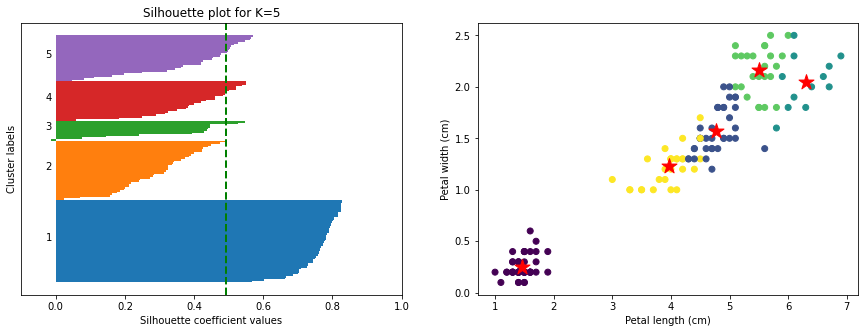

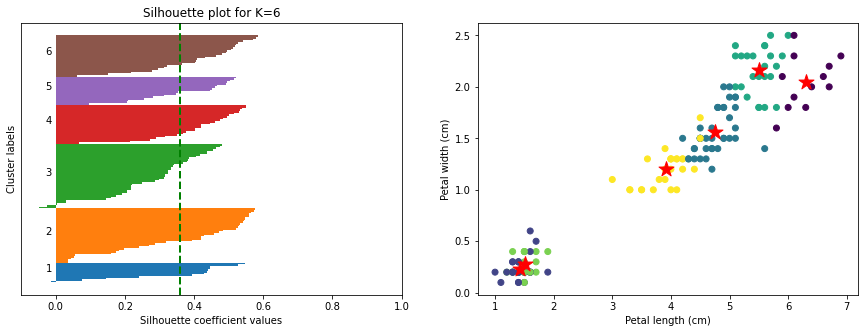

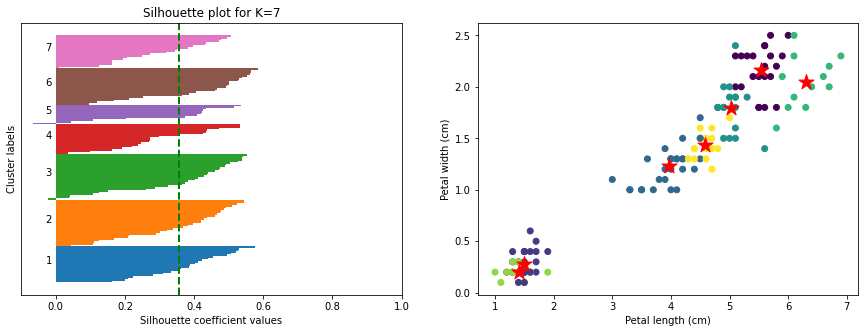

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# load iris data
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# define range of K values
k_values = range(2, 8)

# initialize variables to store results
silhouette_scores = []
best_k = None
best_score = -1

# iterate over range of K values
for k in k_values:
    # fit KMeans model
    km = KMeans(n_clusters=k)
    km.fit(df)
    
    # calculate Silhouette Score
    score = silhouette_score(df, km.labels_)
    silhouette_scores.append(score)
    
    # check if current K has highest score
    if score > best_score:
        best_k = k
        best_score = score
        
        # store the cluster labels for later use
        best_labels = km.labels_

# plot Silhouette Scores for different K values
plt.bar(k_values, silhouette_scores)

# highlight the band with the highest score
plt.axvspan(best_k - 0.5, best_k + 0.5, color='red', alpha=0.2)

# add labels and title
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different values of K')

# show plot
plt.show()

# print best K and its Silhouette Score
print(f"Best K value: {best_k}")
print(f"Silhouette Score: {best_score}")

# iterate over range of K values for silhouette plot
for k in range(2, 8):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(df)

    # get silhouette
    silhouette_vals = silhouette_samples(df, y_predict)

    # silhouette plot
    y_ticks = []
    y_lower = y_upper = 0
    for i, cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax[0].text(-0.03, (y_lower+y_upper)/2, str(i+1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score 
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title(f'Silhouette plot for K={k}')

    # scatter plot of data colored with labels
    ax[1].scatter(df['petal length (cm)'], df['petal width (cm)'], c=km.labels_)
    ax[1].scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], marker='*', c='r', s=250)
    ax[1].set_xlabel('Petal length (cm)')
    ax[1].set_ylabel('Petal width (cm)')
   


For n_clusters = 2, the average silhouette_score is : 0.7653904101383076
For n_clusters = 3, the average silhouette_score is : 0.6604800085022658
For n_clusters = 4, the average silhouette_score is : 0.6127580795614039
For n_clusters = 5, the average silhouette_score is : 0.588373271407563
For n_clusters = 6, the average silhouette_score is : 0.5767097836592128
For n_clusters = 7, the average silhouette_score is : 0.5640984344798261
For n_clusters = 8, the average silhouette_score is : 0.5902255629729695


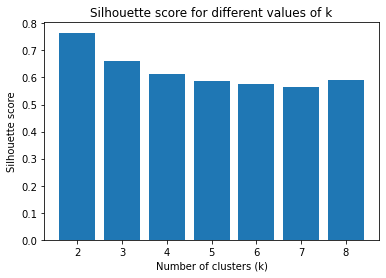

In [4]:


# drop unwanted columns
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)

# list to store silhouette scores for each k
silhouette_scores = []

# loop through different values of k and calculate silhouette score
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

# plot bar chart of silhouette scores
plt.bar(range(2, 9), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different values of k')
plt.show()
